# Imports

In [1]:
import pandas as pd

from coordinate_matching import *
import time

# Code

# Example 1: Artificial data

# Example 2: Real data

We will match MaNGA with Galaxy Zoo DECaLS on their coordinates.

In [2]:
df_manga = pd.read_csv('data/manga_coordinates.csv')
df_gz = pd.read_csv('data/gzdecals_coordinates.csv')

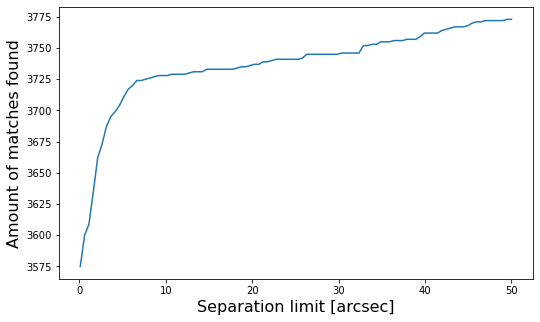

It took 1.11 seconds.


In [3]:
start_time = time.time()

catalog_match_plot_separation_radius([df_manga['objra'],df_manga['objdec']],
                                     [df_gz['ra'],df_gz['dec']])


print(f'It took {np.round(time.time() - start_time,2)} seconds.')

In [4]:
lst = np.array([1,2,3])

In [5]:
lst

array([1, 2, 3])

In [6]:
lst = np.array(lst)

In [7]:
lst

array([1, 2, 3])

In [8]:
df = df_manga.merge(df_gz, left_on = 'iauname',right_on = 'iauname', how='inner')

In [9]:
len(df)

3702

In [10]:
df

,plateifu,iauname,objra,objdec,ra,dec
0,10216-12701,J075354.29+165712.1,118.476259,16.953360,118.476259,16.953360
1,10216-12702,J075255.22+170100.3,118.230123,17.016803,118.230123,17.016803
2,10216-12703,J075429.41+174203.7,118.622597,17.701072,118.622597,17.701072
3,10216-12704,J075238.95+181917.7,118.162300,18.321606,118.162321,18.321595
4,10216-12705,J075134.62+163716.6,117.894285,16.621270,117.894285,16.621270
...,...,...,...,...,...,...
3697,9894-6102,J164658.02+194014.5,251.741870,19.670640,251.741108,19.670994
3698,9894-6103,J164047.71+205513.5,250.198809,20.920389,250.198809,20.920389
3699,9894-6104,J164337.87+214128.6,250.907826,21.691287,250.907826,21.691287
3700,9894-9101,J164501.88+203416.3,251.257839,20.571211,251.257839,20.571211


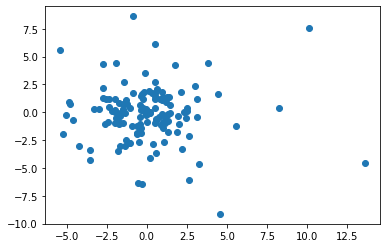

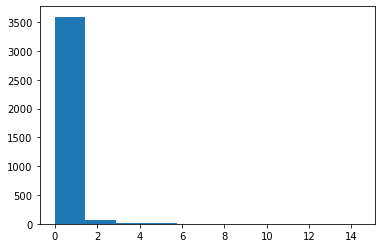

(array([1149, 1913, 2114]),)

In [11]:
delta_ra = (df['ra'] - df['objra'])*3600
delta_dec = (df['dec'] - df['objdec'])*3600

plt.scatter(delta_ra,delta_dec)
plt.show()

delta = np.sqrt(delta_ra**2 + delta_dec**2)
plt.hist(delta)
plt.show()

np.where(delta > 10)

In [12]:
idx, _, _, _ = match_catalogs([df_manga['objra'],df_manga['objdec']],
               [df_gz['ra'],df_gz['dec']],
               limit = 2)

  0%|          | 0/313789 [00:00<?, ?it/s]

  0%|          | 0/11273 [00:00<?, ?it/s]

In [13]:
df_gz = df_gz.reset_index()

# Remove all where idx is np.nan, so no match found.
ind_selection = np.where(np.isnan(idx))[0]
df_manga = df_manga.drop(ind_selection,axis=0)
df_manga = df_manga.reset_index(drop=True)
idx_denan = [int(i) for i in idx if ~np.isnan(i)]

# Match data to it
df_manga['index'] = list(df_gz['index'][idx_denan])
df_coor = df_manga.merge(df_gz,left_on='index',right_on='index', how='inner', suffixes = ('_manga','_gz'))
df_coor = df_coor.drop(columns=['index'])
print('We have ' + str(len(df_coor))+ ' galaxies left.') #12509

We have 3610 galaxies left.


In [14]:
print(len(np.where(~np.isnan(idx))[0]) )
"""
RD = True, R = True 3684
RD = True, R = False 3682
RD = False, R = True 3728
"""

3610


'\nRD = True, R = True 3684\nRD = True, R = False 3682\nRD = False, R = True 3728\n'

In [15]:
df

,plateifu,iauname,objra,objdec,ra,dec
0,10216-12701,J075354.29+165712.1,118.476259,16.953360,118.476259,16.953360
1,10216-12702,J075255.22+170100.3,118.230123,17.016803,118.230123,17.016803
2,10216-12703,J075429.41+174203.7,118.622597,17.701072,118.622597,17.701072
3,10216-12704,J075238.95+181917.7,118.162300,18.321606,118.162321,18.321595
4,10216-12705,J075134.62+163716.6,117.894285,16.621270,117.894285,16.621270
...,...,...,...,...,...,...
3697,9894-6102,J164658.02+194014.5,251.741870,19.670640,251.741108,19.670994
3698,9894-6103,J164047.71+205513.5,250.198809,20.920389,250.198809,20.920389
3699,9894-6104,J164337.87+214128.6,250.907826,21.691287,250.907826,21.691287
3700,9894-9101,J164501.88+203416.3,251.257839,20.571211,251.257839,20.571211


In [16]:
df_coor

,plateifu,iauname_manga,objra,objdec,iauname_gz,ra,dec
0,10216-12701,J075354.29+165712.1,118.476259,16.953360,J075354.29+165712.1,118.476259,16.953360
1,10216-12702,J075255.22+170100.3,118.230123,17.016803,J075255.22+170100.3,118.230123,17.016803
2,10216-12703,J075429.41+174203.7,118.622597,17.701072,J075429.41+174203.7,118.622597,17.701072
3,10216-12704,J075238.95+181917.7,118.162300,18.321606,J075238.95+181917.7,118.162321,18.321595
4,10216-12705,J075134.62+163716.6,117.894285,16.621270,J075134.62+163716.6,117.894285,16.621270
...,...,...,...,...,...,...,...
3605,9894-6101,J164141.93+200445.9,250.424755,20.079417,J164141.93+200445.9,250.424755,20.079417
3606,9894-6103,J164047.71+205513.5,250.198809,20.920389,J164047.71+205513.5,250.198809,20.920389
3607,9894-6104,J164337.87+214128.6,250.907826,21.691287,J164337.87+214128.6,250.907826,21.691287
3608,9894-9101,J164501.88+203416.3,251.257839,20.571211,J164501.88+203416.3,251.257839,20.571211


In [17]:
idx_mismatch = np.where(df_coor['iauname_manga'] != df_coor['iauname_gz'])[0]

In [18]:
len(idx_mismatch)

10

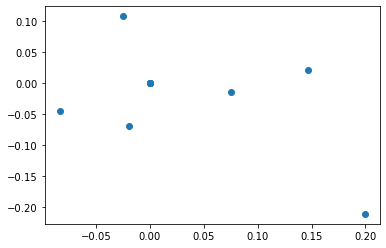

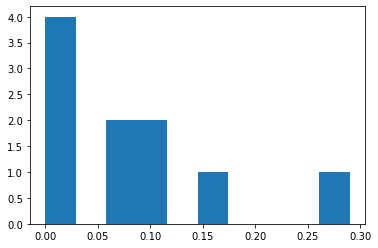

In [19]:
delta_ra = (df_coor['ra'][idx_mismatch] - df_coor['objra'][idx_mismatch]) * 3600
delta_dec = (df_coor['dec'][idx_mismatch] - df_coor['objdec'][idx_mismatch]) * 3600

plt.scatter(delta_ra,delta_dec)
plt.show()

delta = np.sqrt(delta_ra**2 + delta_dec**2)
plt.hist(delta)
plt.show()

#### Looking at those in df, but not matching in df_coor

In [20]:
idxs = []

for i in range(len(df)):
    plateifu = df['plateifu'][i]
    if plateifu not in list(df_coor['plateifu']): #combine this with statement below
        idxs.append(i)
idxs = np.array(idxs)

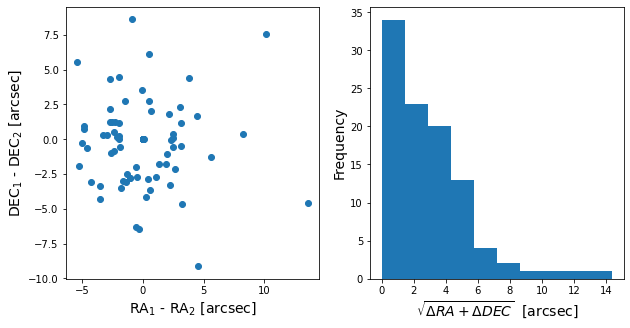

In [23]:
plot_coordinate_difference([df['ra'][idxs], df['dec'][idxs]], [df['objra'][idxs], df['objdec'][idxs]])